# Risk analyst and optimization of Investment Wallet by using Monte Carlo simulation
## by Wojciech Obszański 

In [68]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import xlabel


### Import data:
We are taking wallet which has S&P500, GOOGLE, NVIDIA, APPLE, MICROSOFT, KGHM, PALANTIR, ALIBABA, TOYOTA and SPOTIFY stocks.

In [105]:
tickers = ['^GSPC', 'GOOGL', 'NVDA', 'AAPL', 'MSFT', 'KGH.WA', 'PLTR', 'BABA', 'TM', 'SPOT']

data = yf.download(tickers, start='2020-01-01', end='2025-11-01')

data.head()

/var/folders/rs/rx9snnk15ss4_d166y1sz82h0000gn/T/ipykernel_37787/2049893583.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2025-11-01')
[*********************100%***********************]  10 of 10 completed


Price           Close                                                          \
Ticker           AAPL        BABA      GOOGL     KGH.WA        MSFT      NVDA   
Date                                                                            
2020-01-01        NaN         NaN        NaN  89.448402         NaN       NaN   
2020-01-02  72.468254  208.714478  67.965233  91.619576  152.791107  5.971409   
2020-01-03  71.763718  206.083832  67.609688  89.953766  150.888596  5.875833   
2020-01-06  72.335579  205.741928  69.411758  89.953766  151.278625  5.900473   
2020-01-07  71.995346  206.682129  69.277679  89.804024  149.899323  5.971909   

Price                                                 ...       Volume  \
Ticker     PLTR        SPOT          TM        ^GSPC  ...         AAPL   
Date                                                  ...                
2020-01-01  NaN         NaN         NaN          NaN  ...          NaN   
2020-01-02  NaN  151.619995  121.316765  3257.850098  ...  135480400.0   
2020-01-03  NaN  152.500000  120.045959  3234.850098  ...  146322800.0   
2020-01-06  NaN  156.720001  120.063004  3246.280029  ...  118387200.0   
2020-01-07  NaN  156.020004  120.694145  3237.179932  ...  108872000.0   

Price                                                                       \
Ticker            BABA       GOOGL    KGH.WA        MSFT         NVDA PLTR   
Date                                                                         
2020-01-01         NaN         NaN       0.0         NaN          NaN  NaN   
2020-01-02  15873500.0  27278000.0  232235.0  22622100.0  237536000.0  NaN   
2020-01-03   8604500.0  23408000.0  317912.0  21116200.0  205384000.0  NaN   
2020-01-06  11885500.0  46768000.0       0.0  20813700.0  262636000.0  NaN   
2020-01-07   9388000.0  34330000.0  314584.0  21634100.0  314856000.0  NaN   

Price                                          
Ticker           SPOT        TM         ^GSPC  
Date                                           
2020-01-01        NaN       NaN           NaN  
2020-01-02   662600.0  118100.0  3.459930e+09  
2020-01-03  1018400.0  174900.0  3.484700e+09  
2020-01-06  1311900.0  150200.0  3.702460e+09  
2020-01-07   876700.0  123500.0  3.435910e+09  

[5 rows x 50 columns]

In [106]:
data.describe()

Price         Close                                                      \
Ticker         AAPL         BABA        GOOGL       KGH.WA         MSFT   
count   1467.000000  1467.000000  1467.000000  1471.000000  1467.000000   
mean     161.890310   133.560239   128.864023   129.193274   311.882576   
std       46.880636    62.420117    41.498979    30.439235    98.449975   
min       54.264332    59.973244    52.345470    46.230919   129.171234   
25%      130.572685    82.518997    98.113304   110.512707   235.286858   
50%      161.923248   109.205429   128.195816   127.244232   291.390137   
75%      192.402969   189.373589   155.139969   146.003807   402.647278   
max      271.137146   301.186310   281.480011   209.442917   542.070007   

Price                                                                    ...  \
Ticker         NVDA         PLTR         SPOT           TM        ^GSPC  ...   
count   1467.000000  1279.000000  1467.000000  1467.000000  1467.000000  ...   
mean      54.017837    38.001822   274.043128   156.390251  4522.125787  ...   
std       53.214903    44.906995   173.659773    31.041199   971.996139  ...   
min        4.891361     6.000000    71.050003    92.539864  2237.399902  ...   
25%       14.316514    12.255000   145.529999   130.939316  3899.634888  ...   
50%       25.194603    21.709999   238.110001   158.137161  4363.549805  ...   
75%       94.307133    30.375000   320.615005   177.904709  5234.830078  ...   
max      207.039993   200.470001   775.900024   243.764069  6890.890137  ...   

Price         Volume                                                          \
Ticker          AAPL          BABA         GOOGL        KGH.WA          MSFT   
count   1.467000e+03  1.467000e+03  1.467000e+03  1.471000e+03  1.467000e+03   
mean    8.567157e+07  2.062949e+07  3.350814e+07  6.897470e+05  2.767459e+07   
std     5.152125e+07  1.366071e+07  1.478380e+07  3.768135e+05  1.241887e+07   
min     2.323470e+07  5.235400e+06  9.312000e+06  0.000000e+00  7.164500e+06   
25%     5.164290e+07  1.286395e+07  2.397675e+07  4.367895e+05  1.966900e+07   
50%     7.128500e+07  1.725060e+07  2.990800e+07  5.877750e+05  2.442620e+07   
75%     1.017582e+08  2.337755e+07  3.812375e+07  8.332000e+05  3.191580e+07   
max     4.265100e+08  1.598343e+08  1.274901e+08  3.156444e+06  9.701270e+07   

Price                                                                         
Ticker          NVDA          PLTR          SPOT            TM         ^GSPC  
count   1.467000e+03  1.279000e+03  1.467000e+03  1.467000e+03  1.467000e+03  
mean    4.154316e+08  5.981469e+07  1.897754e+06  2.901614e+05  4.489124e+09  
std     1.936319e+08  4.193377e+07  1.521788e+06  1.490229e+05  1.070214e+09  
min     9.788400e+07  9.126400e+06  4.358000e+05  5.990000e+04  0.000000e+00  
25%     2.643000e+08  3.405400e+07  1.165600e+06  1.941500e+05  3.812880e+09  
50%     3.903090e+08  4.721320e+07  1.539200e+06  2.540000e+05  4.255710e+09  
75%     5.247995e+08  7.034715e+07  2.113850e+06  3.447000e+05  4.894080e+09  
max     1.543911e+09  4.502905e+08  2.768770e+07  1.923000e+06  9.976520e+09  

[8 rows x 50 columns]

## Data Cleaning
Dataset contains NaN values, which primarily occur when one stock exchange was closed for a holiday while another was open.
### My cleaning process is as follows:

1) For the Volume column: I will fill NaN values with 0. A closed market means zero trading volume.

2) For price columns (Open, High, Low, Close): I will forward-fill the NaN values. This propagates the last known price to the day the market was closed, correctly assuming the price did not change.

3) After filling, I will drop any remaining rows with NaNs. This handles cases at the very beginning of the dataset where historical data was not available for all assets.

In [107]:
data['Volume'] = data['Volume'].fillna(0) # first step

data = data.ffill() # second step

clean_df = data.dropna() # third step

clean_df.head(20) #checking the clean data

Price            Close                                                 \
Ticker            AAPL        BABA      GOOGL      KGH.WA        MSFT   
Date                                                                    
2020-09-30  112.541367  279.191315  72.778046  110.430122  201.669739   
2020-10-01  113.493683  275.459015  73.885399  107.762955  203.712067   
2020-10-02  109.830086  273.673645  72.281471  107.622581  197.700226   
2020-10-05  113.211868  273.768555  73.633652  110.710884  201.717712   
2020-10-06  109.966141  277.681335  72.054047  109.681450  197.431778   
2020-10-07  111.831947  281.584564  72.457260  112.301819  201.190338   
2020-10-08  111.725052  285.421356  73.663437  108.698807  201.909454   
2020-10-09  113.668610  284.661560  75.005180  112.255028  206.924088   
2020-10-12  120.888893  290.929565  77.693642  114.079933  212.283951   
2020-10-13  117.682060  293.246857  77.816780  111.365974  213.683807   
2020-10-14  117.769501  285.896210  77.636536  116.513145  211.766174   
2020-10-15  117.303055  284.395660  77.240768  116.513145  210.615601   
2020-10-16  115.660751  291.850769  77.848083  118.244461  210.615601   
2020-10-19  112.706551  289.932373  75.973503  116.981064  205.399597   
2020-10-20  114.193375  294.225006  77.022774  119.975777  205.811859   
2020-10-21  113.571434  292.477600  78.756317  122.783325  205.955719   
2020-10-22  112.483040  290.872589  79.782722  118.946342  206.041992   
2020-10-23  111.793083  294.329498  81.089722  118.384834  207.326813   
2020-10-26  111.802803  291.432922  78.671890  116.981064  201.430069   
2020-10-27  113.309052  301.186310  79.396400  117.776527  204.469543   

Price                                                              ...  \
Ticker           NVDA   PLTR        SPOT          TM        ^GSPC  ...   
Date                                                               ...   
2020-09-30  13.489321   9.50  242.570007  116.697624  3363.000000  ...   
2020-10-01  13.573068   9.46  250.190002  116.688805  3380.800049  ...   
2020-10-02  13.022495   9.20  240.279999  116.072014  3348.419922  ...   
2020-10-05  13.600981   9.03  251.369995  116.398056  3408.600098  ...   
2020-10-06  13.694695   9.90  248.539993  115.657890  3360.969971  ...   
2020-10-07  13.921503  10.00  251.509995  116.688805  3419.439941  ...   
2020-10-08  13.796634  10.00  249.800003  117.147018  3446.830078  ...   
2020-10-09  13.720862   9.95  250.000000  116.380432  3477.139893  ...   
2020-10-12  14.182706   9.89  251.440002  116.133698  3534.219971  ...   
2020-10-13  14.204889   9.47  266.950012  116.882668  3511.929932  ...   
2020-10-14  14.052353   9.34  257.619995  115.895798  3488.669922  ...   
2020-10-15  13.927487   9.91  261.549988  115.578590  3483.340088  ...   
2020-10-16  13.769468   9.71  262.549988  115.111588  3483.810059  ...   
2020-10-19  13.456674   9.57  261.010010  115.323067  3426.919922  ...   
2020-10-20  13.603974   9.27  260.950012  115.701950  3443.120117  ...   
2020-10-21  13.483591   9.20  271.320007  117.314430  3435.560059  ...   
2020-10-22  13.320339   9.68  271.880005  117.561134  3453.489990  ...   
2020-10-23  13.548891   9.49  283.489990  117.437790  3465.389893  ...   
2020-10-26  13.101256   9.95  284.959991  117.058907  3400.969971  ...   
2020-10-27  13.355981  10.95  287.450012  116.715263  3390.679932  ...   

Price            Volume                                                 \
Ticker             AAPL        BABA       GOOGL     KGH.WA        MSFT   
Date                                                                     
2020-09-30  142675200.0  24777700.0  40924000.0   572246.0  33829100.0   
2020-10-01  116120400.0  16304000.0  32884000.0   370488.0  27158400.0   
2020-10-02  144712000.0  11482800.0  31222000.0   586425.0  33154800.0   
2020-10-05  106243800.0  17876400.0  21602000.0   736851.0  21331600.0   
2020-10-06  161498200.0  15860400.0  26096000.0   391568.0  28554300.0   
2020-10-07   96849000.0  

###  Visualisation of some important data:

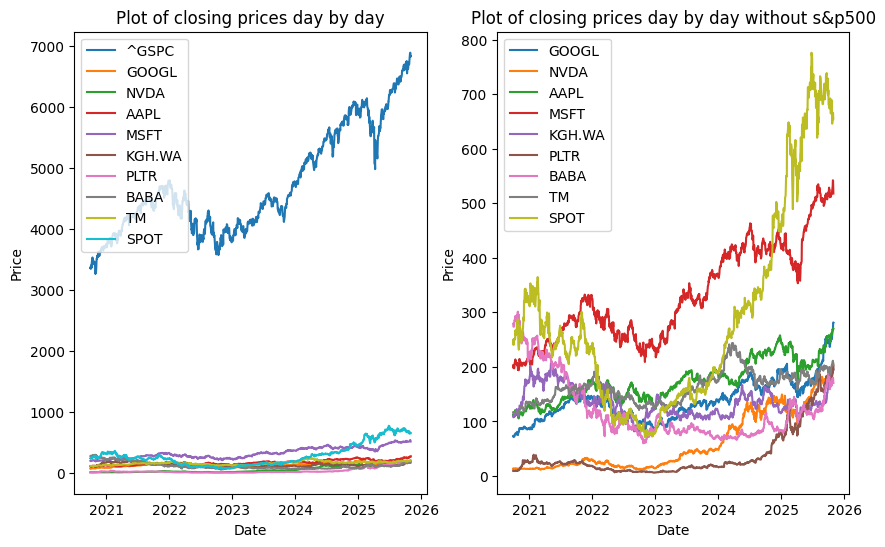

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
close_df = clean_df['Close']

for ticker in tickers:
    ax[0].plot(close_df[ticker], label=ticker)
    ax[0].legend(loc='upper left')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Price')
    ax[0].set_title('Plot of closing prices day by day')
    
tickers2 = ['GOOGL', 'NVDA', 'AAPL', 'MSFT', 'KGH.WA', 'PLTR', 'BABA', 'TM', 'SPOT']
for ticker in tickers2:
    ax[1].plot(close_df[ticker], label=ticker)
    ax[1].legend(loc='upper left')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Price')
    ax[1].set_title('Plot of closing prices day by day without s&p500')

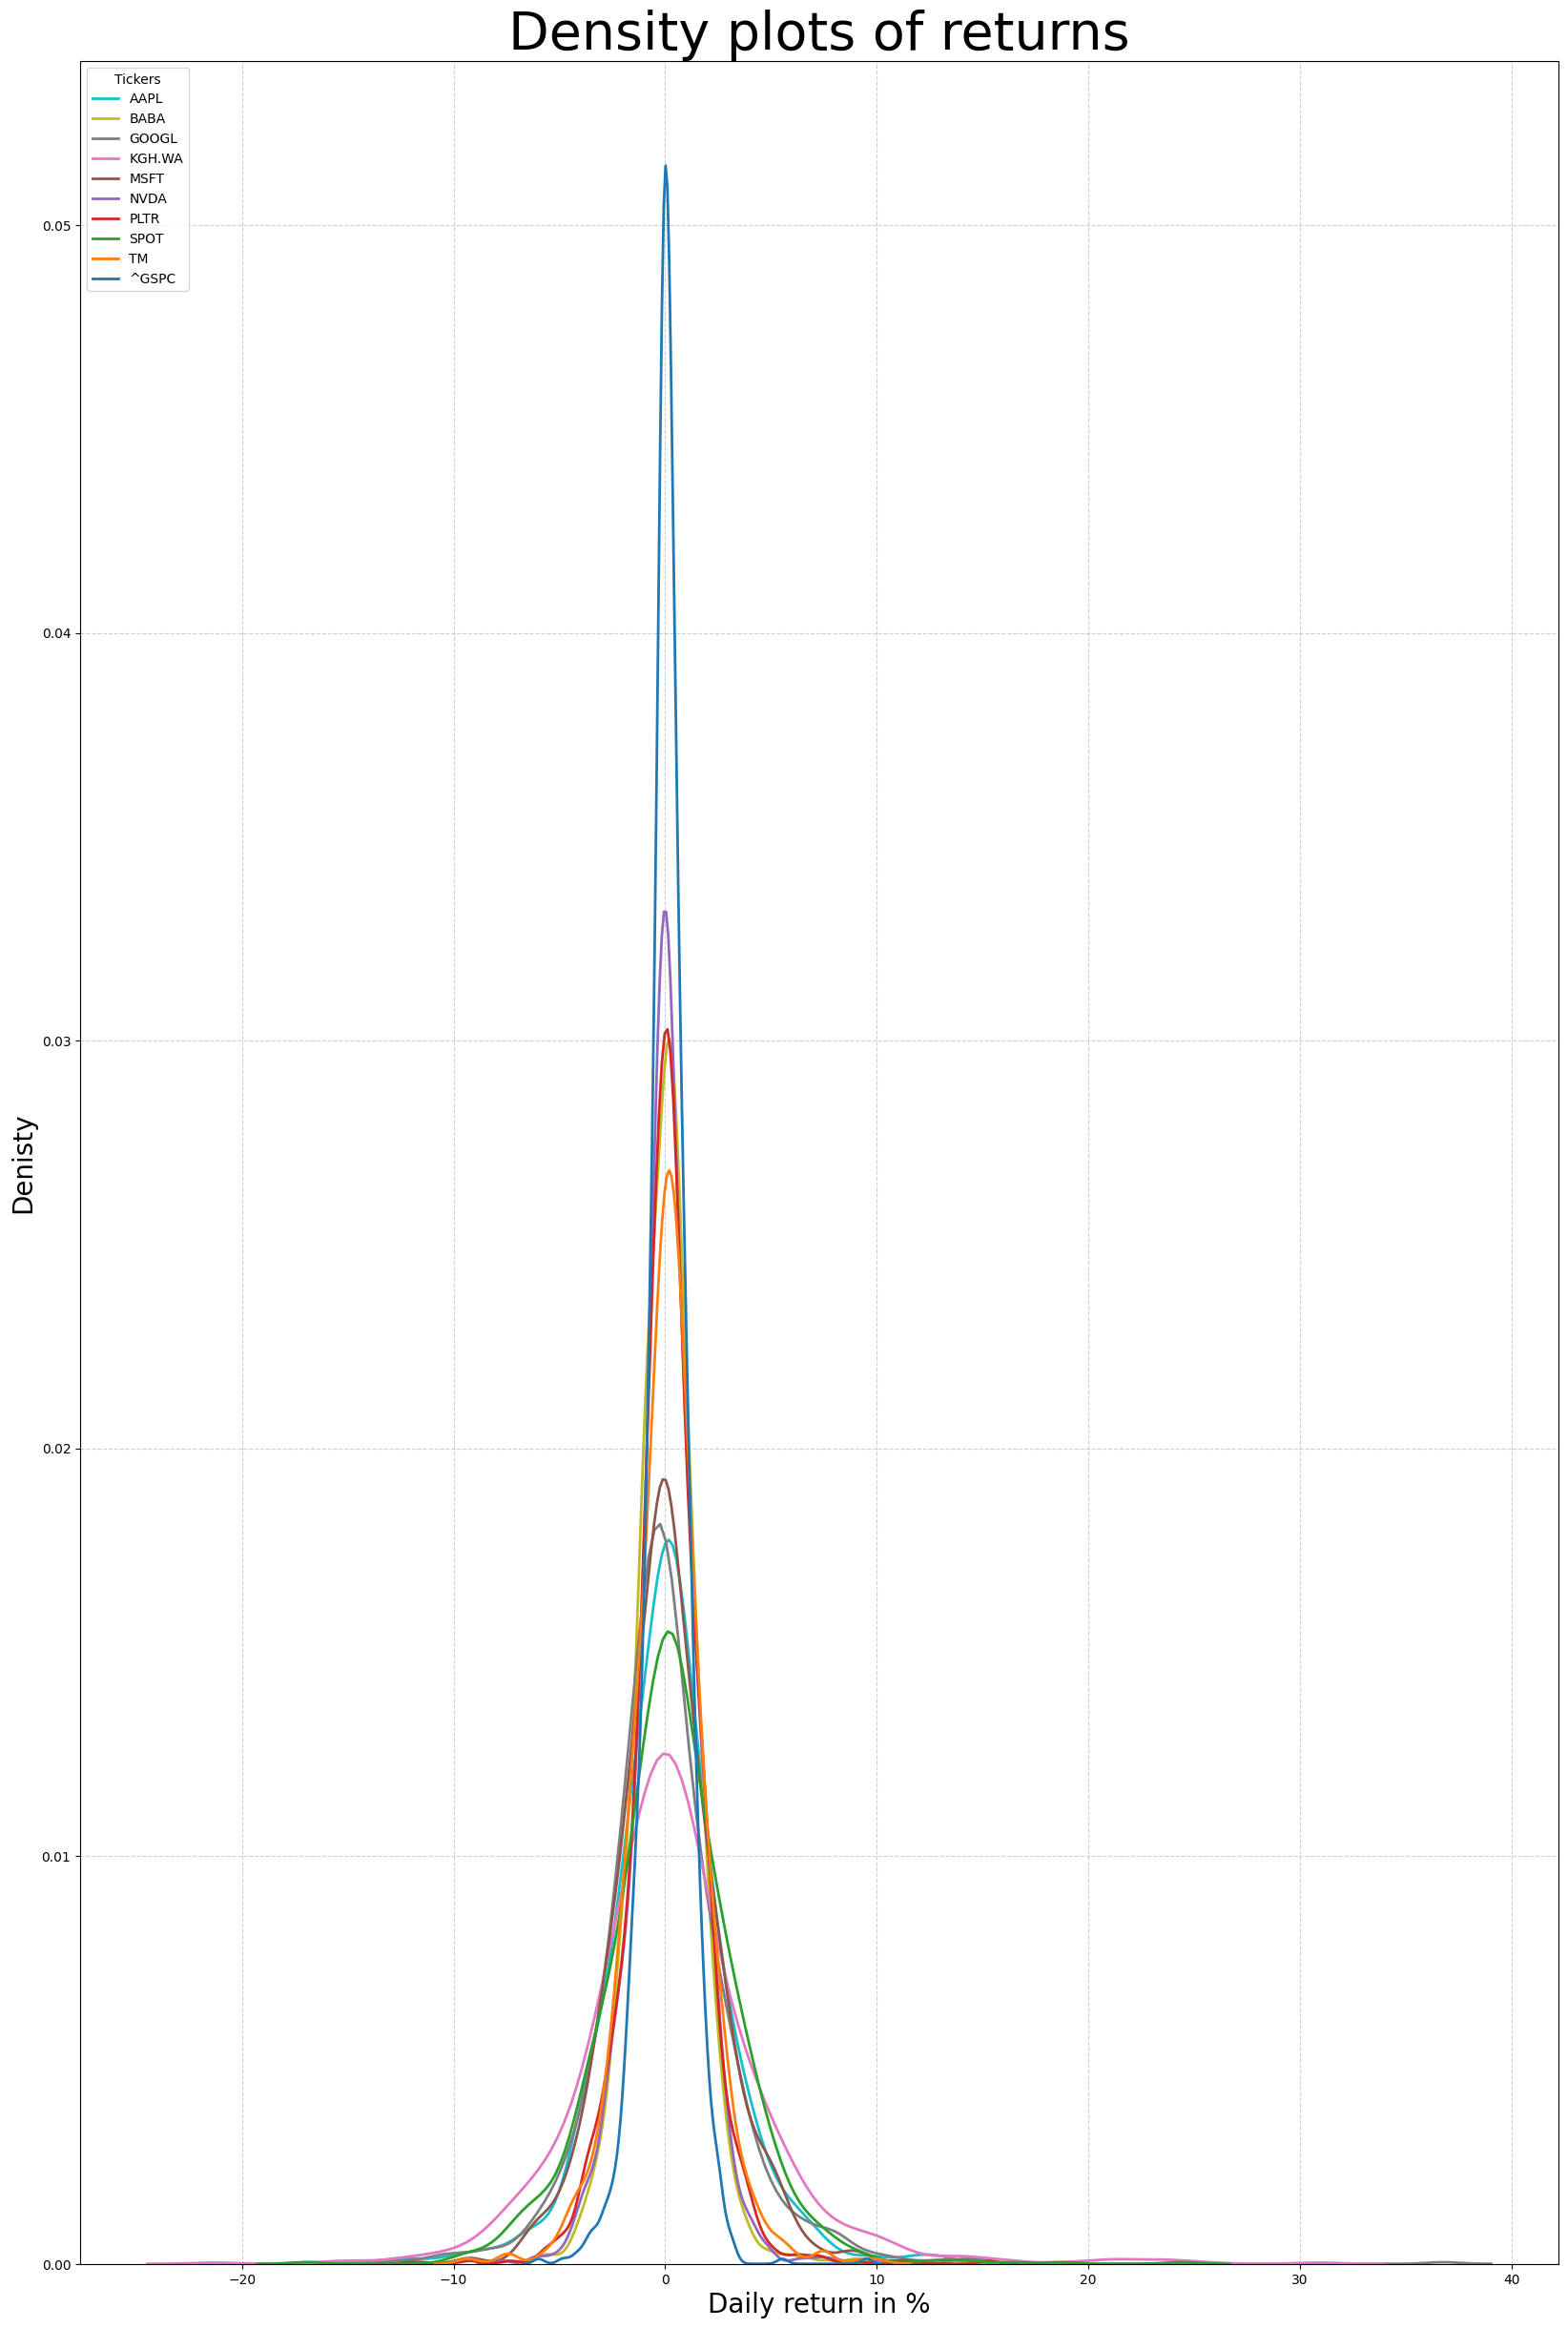

In [145]:
plt.figure(figsize = (20,30))
sns.kdeplot(data= (data['Close'][tickers].pct_change() * 100).dropna(), linewidth= 2.0)
plt.title('Density plots of returns', fontsize=40)
plt.xlabel('Daily return in %', fontsize=20)
plt.ylabel('Denisty', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(labels= data['Close'].columns, title= 'Tickers', loc='upper left')

plt.show()




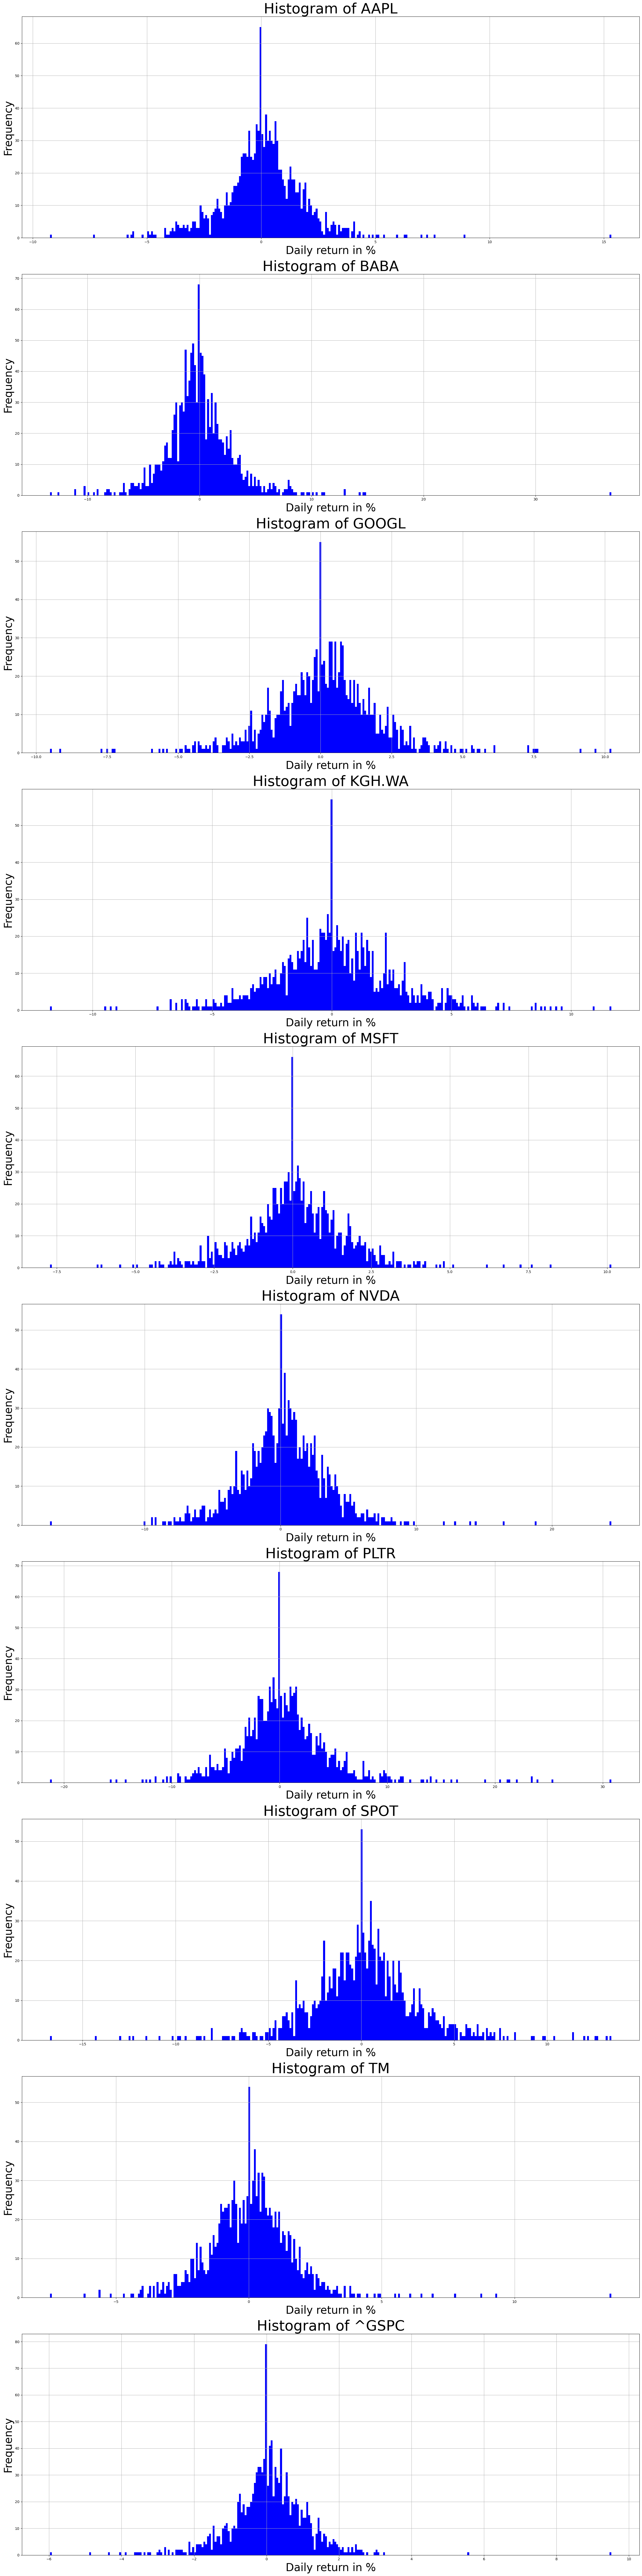

In [125]:
axes = (data['Close'].pct_change() * 100).dropna().hist(bins=300, color= 'blue', layout=(len(data['Close'].columns), 1), figsize=(25, 100))

for ax in axes.flatten():
    title = ax.get_title()
    ax.set_title(f'Histogram of {title}', fontsize=40)
    ax.set_ylabel('Frequency', fontsize=30)
    ax.set_xlabel('Daily return in %', fontsize=30)

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Daily correlation matrix')

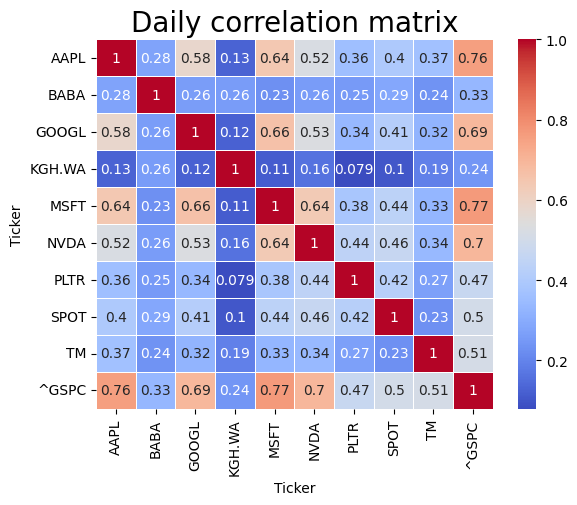

In [126]:
daily_returns = clean_df['Close'].pct_change().dropna()
corr_matrix = daily_returns.corr() # Pearson correlation

sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', linewidths= 0.5)
plt.title('Daily correlation matrix', fontsize=20)


## Wallet Modeling

In [127]:
daily_returns = clean_df['Close'].pct_change().dropna()

avg_return = daily_returns.mean() # average of daily returns
cov_matrix = daily_returns.cov() # covariant matrix

num_assets = daily_returns.shape[1] #write a number of our assets down


 We have to define a sample weights

In [128]:
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]) # let's give each of our assets the same weight

Now, we have to calculate expected annual return.


We will use formula:  Wallet return = (weight A * avg_return A) + (weight B * avg_return B) + ...

In [129]:
annual_expected_return = np.dot(weights, avg_return) * 252 # np.dot(weights, avg_return) means daily expected return, so we have to multiply by 252, because we have around 252 stock exchange open' s days

print(f"Expected Annual Return: {annual_expected_return * 100:.2f}% .")

Expected Annual Return: 30.22% .


Now, We're going to calculate Annual Wallet Risk

We're using formula: Variability = √ (weights^T * cov_matrix * weights)

In [130]:
annual_expected_risk = np.sqrt(np.dot(np.dot(weights.T, cov_matrix), weights) * 252) # np.dot(np.dot(weights.T, cov_matrix), weights) means daily expected risk, so we have to multiply by 252, because we have around 252 stock exchange open' s days. We put everything under √, because √(np.dot(np.dot(weights.T, cov_matrix), weights)) * √252 = √(np.dot(np.dot(weights.T, cov_matrix), weights) * 252)

print(f'Expected Anually Risk: {annual_expected_risk * 100:.2f}%.')

Expected Anually Risk: 25.04%.


Now, we're going to calculate Shape Ratio


We're using formula: Sharpe ratio = (Annualy return - Risk Free Rate) / Annualy Risk


For simplicity, We assume that Risk Free Rate is equal 0.

In [131]:
risk_free_rate = 0.0

srhape_ratio = (annual_expected_return - risk_free_rate) / annual_expected_risk

print(f'Shape Ratio: {srhape_ratio:.2f}%.')

Shape Ratio: 1.21%.


We can see that Sharpe Ratio is very low, which means that Our Wallet is unfortunate.


### Let's start doing our Monte Carlo simulation

In [132]:
monte_carlo_results = []

risk_free_rate = 0.0
for _ in range(10000):
    weights = np.random.rand(10)
    weights /= weights.sum()
    
    annual_expected_return = np.dot(weights, avg_return) * 252
    annual_expected_risk = np.sqrt(np.dot(np.dot(weights.T, cov_matrix), weights) * 252)
    sharpe_ratio = (annual_expected_return - risk_free_rate) / annual_expected_risk

    monte_carlo_results.append({
        'weights': weights,
        'Annual Expected Return': annual_expected_return,
        'Expected Anually Risk': annual_expected_risk,
        'Expected Sharpe Ratio': sharpe_ratio,
    })


results_df = pd.DataFrame(monte_carlo_results)
results_df.head()

,weights,Annual Expected Return,Expected Anually Risk,Expected Sharpe Ratio
0,"[0.09280483909027003, 0.07699816418200837, 0.10039161906435681, 0.15235716432694443, 0.09579788899938277, 0.07277989500327452, 0.11077146294932941, 0.1811793193403218, 0.07513008218762558, 0.04178956485648634]",0.312968,0.261841,1.195259
1,"[0.09772562506101012, 0.03130566012707314, 0.1618037499917746, 0.006929125953778555, 0.10090582713549694, 0.20543896362771522, 0.24853223215659667, 0.057051178136778964, 0.05290959329952018, 0.03739804451025574]",0.463216,0.333625,1.388435
2,"[0.17715142512646798, 0.1618929719718102, 0.16748615652834745, 0.12702436330663025, 0.041240135299638055, 0.005465102809091309, 0.1237134764624431, 0.10444562544505283, 0.03432137316484429, 0.05725936988567445]",0.277126,0.257546,1.076024
3,"[0.01721529708278676, 0.15284378328604578, 0.15769107446383285, 0.14596014881750952, 0.0994454705793404, 0.1390781559842191, 0.055073953305472066, 0.08743032815891974, 0.08511580545485735, 0.06014598286701634]",0.289253,0.254122,1.138245
4,"[0.14619262212679254, 0.1337251158148525, 0.028952472252317302, 0.0678715285736234, 0.06483475110157698, 0.10193636181654189, 0.10887528197730144, 0.07947762120538099, 0.022629978592128914, 0.24550426653948398]",0.290753,0.253522,1.146855


### Now we are looking for the best wallet

We're searching for a wallet with highest Sharpe Ratio

This will be the most optimal wallet

In [134]:
max_sharpe_portfolio = results_df.loc[results_df['Expected Sharpe Ratio'].idxmax()]

tickers_with_weights = []
for i in range(10):
    tickers_with_weights.append((tickers[i], max_sharpe_portfolio['weights'][i]))

print("Maximal Sharpe Portfolio:")
print(f"Annual Return: {max_sharpe_portfolio['Annual Expected Return'] * 100:.2f}%")
print(f"Annual Risk: {max_sharpe_portfolio['Expected Anually Risk'] * 100:.2f}%")
print(f"Sharpe Ratio: {max_sharpe_portfolio['Expected Sharpe Ratio']:.2f}")
print(f"Assets with weights: {tickers_with_weights}")

Maximal Sharpe Portfolio:
Annual Return: 46.41%
Annual Risk: 32.20%
Sharpe Ratio: 1.44
Assets with weights: [('^GSPC', 0.04425866149405397), ('GOOGL', 0.016133074546269634), ('NVDA', 0.1904702673878982), ('AAPL', 0.062207336337074516), ('MSFT', 0.05041684298347787), ('KGH.WA', 0.2587839435611402), ('PLTR', 0.2176230638566684), ('BABA', 0.010308962711461606), ('TM', 0.04303742351091854), ('SPOT', 0.106760423611037)]


We're searching for a wallet with lowest Risk

This will be the safest wallet

In [136]:
min_risk_portfolio = results_df.loc[results_df['Expected Sharpe Ratio'].idxmin()]

tickers_with_weights = []
for i in range(10):
    tickers_with_weights.append((tickers[i], min_risk_portfolio['weights'][i]))

print("Minimal Risk Portfolio:")
print(f"Annual Return: {min_risk_portfolio['Annual Expected Return'] * 100:.2f}%")
print(f"Annual Risk: {min_risk_portfolio['Expected Anually Risk'] * 100:.2f}%")
print(f"Sharpe Ratio: {min_risk_portfolio['Expected Sharpe Ratio']:.2f}")
print(f"Assets with weights: {tickers_with_weights}")

Minimal Risk Portfolio:
Annual Return: 14.68%
Annual Risk: 22.90%
Sharpe Ratio: 0.64
Assets with weights: [('^GSPC', 0.15357847128379848), ('GOOGL', 0.2685128584137482), ('NVDA', 0.012834576104130559), ('AAPL', 0.1300892228732769), ('MSFT', 0.02950549823267003), ('KGH.WA', 0.007467726020991148), ('PLTR', 0.00888181472457361), ('BABA', 0.016675924951064056), ('TM', 0.14880661770047005), ('SPOT', 0.22364728969527697)]
